# Practical 1 : Implementation of Linear Regression (Ridge, Lasso)

Team: 
Naina Srivastava : 21738117, 
Lorenzo Alessandro Repenning: 21717665 


- Train a linear model
    - using least squares method
    - implement the model from scratch using NumPy 
    - Use learning curves plot to understand whether the linear moel is overfitting or underfitting
- Train linear models with 
    - regularization (Ridge and Lasso)
    - polynomial basis expansion
    - use validation data to choose the hyperparameters
    - scikit-learn
    - Optional task: Use k-fold cross validation to choose the optimal hyperparameters (5 bonus points)

We will use the following packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import _pickle as cp

We will use the winequality dataset for this practical. The dataset is available here:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality. 
In order to make it easier to import the dataset, the dataset has been converted to the numpy array format and shuffled, so that we can start the practical directly. The converted dataset is available on the OLAT page.

The dataset has two files. We’ll focus on the white wine data, which is the larger dataset. The following code loads the data:

In [2]:
# load the white wine dataset
# X is the feature matrix that stores the feature values of the data records
# y is the label vector that stores the labels of the data records
X, y = cp.load(open('winequality-white.pickle', 'rb'))

# check the size of the data
print("X is a {} matrix, which contains {} data records and {} features.".format(X.shape, X.shape[0], X.shape[1]))
print("y is a {}-dimentional vector, which stores the corresponding labels of the data records in X".format(y.shape[0]))


X is a (4898, 11) matrix, which contains 4898 data records and 11 features.
y is a 4898-dimentional vector, which stores the corresponding labels of the data records in X


We next split the data into training data and test data. 
In practice, we should sample randomly 80% of the data as training data and the rest as the test data. . 
However, in order to get consistent results, we use the first 80% of the data as training
data and the remaining as the test data. 
To achieve this split, we define the following function.

In [3]:
# The function splits the dataset into training data and testing data.
# The parameter split_coeff is a percentage value such that
# the first split_coeff of the dataset goes to the training dataset 
# and the remaining data goes to the test dataset.
def split_data(X, y, split_coeff):
    N, _ = X.shape # get the number of records (rows)
    train_size = int(split_coeff * N) # use the first split_coeff of the data as the training data
    X_train = X[:train_size] # the first training_size records
    y_train = y[:train_size]
    X_test = X[train_size:] # the last test_size records
    y_test = y[train_size:]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_data(X, y, 0.8) # split the data with split_coeff=0.8

# check the size of the splitted dataset
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3918, 11)
Shape of y_train: (3918,)
Shape of X_test: (980, 11)
Shape of y_test: (980,)


## Understanding What We’re Predicting

Let’s first check
the distribution of the y-values in the training data. 
You will find that the values are integers between 3 and 9 indicating the quality of the wine.


### **Task 1**
Make a bar chart showing the distribution of y-values in the training data. You will find that the y-values are integers from 3 to 9, which indicate the quality of the wines.

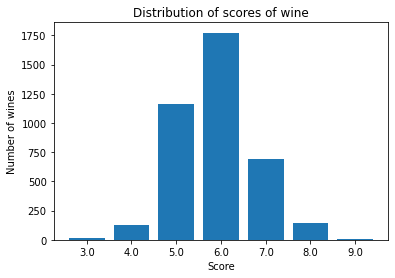

In [4]:
#@title
# Task 1: 
# the function takes the y-values in the training data as the input and makes the bar chart. 
# Hint: Your function should make a bar chart looks like the bar chart below.



def plot_bar_chart_score(y_train):
  unique, counts = np.unique(y_train, return_counts=True)
  a=dict(zip(unique, counts))
   

  plt.bar(range(len(a)), list(a.values()), align='center')
  plt.xticks(range(len(a)), list(a.keys()))
  plt.ylabel("Number of wines")
  plt.xlabel("Score")
  plt.title('Distribution of scores of wine')
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################

    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################

plot_bar_chart_score(y_train)

### **Task 2** 
This task is to build a trivial predictor, which always returns the mean of the y-values of the training data. We consider the trivial model as a baseline. The linear regression models we build later should perform better than this trivial model. 

In [5]:
#@title
# Task 2: implement the trivial predictor
# The function computes the average value of y on the training label values
def compute_average(y_train):
  m_ytrain=np.mean(y_train, axis=0)
    # The code below is just for compilation. 
    # You need to delete it and write your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
    # Hint: return the mean of y_train
  return m_ytrain
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################

y_train_avg = compute_average(y_train)
print("Average of y on the training label values is {}".format(y_train_avg))

# The trivial predictor returns the average value.
def trivial_predictor(X_test, y_train_avg):
  return y_train_avg


Average of y on the training label values is 5.878764675855028


### **Task 3**
We next evaluate the trivial predictor on the training data and test data. 
We use mean squared error (MSE) to measure the performance of the predictor.
The task is to implement a function that reports the mean squared error of the given predictor on the given data. 

In [6]:
# We next test our trivial predictor on the training data and test data. 
# Implement a function that can report the mean squared error 
# of a predictor on the given data
# Input: data and predictor
# Output: mean squared error of the predictor on the given data
def test_predictor(X, y, predictor: callable=None):
    # Apply the predictor to each row of the matrix X to get the predictions
    y_predicted = np.apply_along_axis(predictor, 1, X)

    # TODO: compute the mean squared error of y
    # The code below is just for compilation. 
    # You need to delete it and write your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
    mse = np.square(np.subtract(y,y_predicted)).mean() 

    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################
    
    return mse

# use the function test_predictor to test the trivial predictor
# we use the lambda function here to pass the function trivial predictor to the function test_predictor.
mse_trivial_predictor_train = test_predictor(X_train, y_train, lambda x: trivial_predictor(x, y_train_avg))
mse_trivial_predictor_test = test_predictor(X_test, y_test, lambda x: trivial_predictor(x, y_train_avg))

# Report the result
print('Trivial Predictor')
print('--------------------------------------------------------------------------------\n')
print('MSE (Training) = %.4f' % mse_trivial_predictor_train)
print('MSE (Testing)  = %.4f' % mse_trivial_predictor_test)

Trivial Predictor
--------------------------------------------------------------------------------

MSE (Training) = 0.7768
MSE (Testing)  = 0.8139


## Train the Linear Model Using Least Squares Method

Let us train a linear model on the training data and then check its MSE. 
We use the closed form solution of the least squares estimate to get the parameters of the linear model. 
The linear model should perform better than the trivial predictor.

### **Task 4**
Before training the model, we need to standardize the data, i.e., transform the data so that every feature has mean 0 and variance 1. 

https://en.wikipedia.org/wiki/Standard_score

We first standardize the training data. 
Then we apply the same transformation to the test data, i.e. standardize the test data using the means and the standard deviations of the training data. 

In [7]:
# The task is to implement a function that can standardize the data and returns the mean and std of the data.
# Input: training data
# Output: standardize training data, standard deviations and means
def standardize_data(X):
    # TODO: compute the means and standard deviations of the data, and standardize the data
    # The code below is just for compilation. 
    # You need to replace it by your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_std = (X-mean)/std
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################
    
    return X_std, mean, std

# Standardize the training data and store the means and the stds 
X_train_std, X_train_mean, X_train_std_div = standardize_data(X_train)
print("X_train_std:", X_train_std.shape)
print("Mean:", X_train_mean)
print("Standard deviation:", X_train_std_div)

X_train_std: (3918, 11)
Mean: [6.85427514e+00 2.78390761e-01 3.34892802e-01 6.42623788e+00
 4.58213374e-02 3.53263144e+01 1.38513272e+02 9.94040729e-01
 3.18647524e+00 4.89055641e-01 1.05115799e+01]
Standard deviation: [8.39100902e-01 9.95630176e-02 1.24249975e-01 5.06377532e+00
 2.16660282e-02 1.71004677e+01 4.23956179e+01 2.97972269e-03
 1.49949475e-01 1.12992053e-01 1.22536544e+00]


In [8]:
X_test_std = (X_test-X_train_mean)/X_train_std_div
print(X_test_std.shape)

(980, 11)


### **Task 5**
We have standardized X-values. Do we need to standardize the y-values? Why?

We standardize the x values to prevent multicollinearity and biasness from entering our model. Since y has no multicollinearity or bias issues, we do not need to standardize its values. 

### **Task 6**
Let's now train the linear model using the least-squares method. 
We need to add the bias term to the matrix X. 

In [9]:
# The task is to implement the function that adds a column of ones to the front of the input matrix
def expand_with_ones(X):
    # TODO: add a column of ones to the front of the input matrix
    # The code below is just for compilation. 
    # You need to replace it by your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
    one = np.ones((len(X),1))
    X_out = np.append(one, X, axis=1)
    return X_out
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################

# Train the linear model using the least-squares method
# The task is to implement the function that computes the parameters
def least_squares_compute_parameters(X_input, y):
    # add the bias column to the data
    X = expand_with_ones(X_input)

    # TODO: compute the parameters based on the expanded X and y using the least-squares method
    # The code below is just for compilation. 
    # You need to replace it by your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
    w= np.dot((np.linalg.inv(np.dot(X.T,X))), np.dot(X.T,y))
    return w
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################

# Apply the function to train the linear model
w = least_squares_compute_parameters(X_train_std, y_train) 
print("w:", w.shape)
print(w)

w: (12,)
[ 5.87876468e+00  5.70365710e-02 -1.83384219e-01 -4.04067444e-03
  4.09097280e-01 -8.17517111e-03  5.92929519e-02 -3.56633675e-03
 -4.36936781e-01  9.87381161e-02  6.53325059e-02  2.42495455e-01]


After computing the parameters,
we can build the linear model predictor.
The predictor takes as input the computed parameters and the data, and predicts the labels for the input data.

In [10]:
# Implement the linear model predictor
# Input: test data and parameters
# Output: predicted values
def linear_model_predictor(X, w):
  y_predicted=np.dot(X,w)

    # TODO: predict the labels for the input data
    # The code below is just for compilation. 
    # You need to replace it by your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
  return y_predicted

    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################


We can now evaluate our linear model predictor on the test data. 

In [11]:
# use the function test_predictor to evaluate the linear model predictor
mse_linear_model_predictor = test_predictor(expand_with_ones(X_test_std), y_test, lambda x: linear_model_predictor(x, w))
print("Mean squared error is {}".format(mse_linear_model_predictor))

Mean squared error is 0.5607292042283475


## Learning Curves

Let us check if the linear model is overfitting or underfitting. Since the dataset is somewhat large and there are only 11 features, the model shouldn't be overfitting. 
To check it, we need to check the learning curves, i.e. how the performance of the model changes when it is trained with increasingly more data. 
We train the model on the increasingly more data ([20, 40, ..., 600] data records), and evaluate the model by computing the MSE of the model on both the training data and the test data. 
We use the collected MSE to build the learning curves plot. 

### **Task 7** 

Let's first implement a function that comprises what we have implemented above. 
The function takes as inputs the data and the split coefficient, and
1. standardizes the data,
2. trains the linear model, and
3. reports the mse of the linear model predictor on both training and test datasets. 

In [12]:
# Input: training data and test data

# Output: mse of the linear model predictor on both the training and test data
def train_and_test(X_train, y_train, X_test, y_test):
    # TODO: implement the function 
    # The code below is just for compilation. 
    # You need to replace it by your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
    # Hints: use the functions you have implemented
    X_train_std, X_train_mean, X_train_std_div = standardize_data(X_train)
    X_test_std = (X_test-X_train_mean)/X_train_std_div
    X_input_test=expand_with_ones(X_test_std)
    X_input_train=expand_with_ones(X_train_std)
    w=least_squares_compute_parameters(X_train_std, y_train)
    y_train_pred=linear_model_predictor(X_input_train, w)
    mse_train = np.square(np.subtract(y_train,y_train_pred)).mean() 
    y_test_pred=linear_model_predictor(X_input_test, w)
    mse_test = np.square(np.subtract(y_test,y_test_pred)).mean() 
  
    return mse_train, mse_test
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################

mse_train, mse_test = train_and_test(X_train, y_train, X_test, y_test)

print('Linear Model')
print('-----------------------\n')
print('MSE (Training) = %.4f' % mse_train)
print('MSE (Testing)  = %.4f' % mse_test)

Linear Model
-----------------------

MSE (Training) = 0.5640
MSE (Testing)  = 0.5607


We are now ready to report the learning curves.
The task is to train the linear model on the increasingly more data ([20, 40, ..., 600] data records)
and store the MSE of the trained model on the training data and the test data in the lists `mse_train_v` and `mse_test`, respectively. 
We have provided the code for generating the learning curves from `mse_train_v` and `mse_test`.

2.5211029712037423 20
1.0478049625321126 40
0.7501432748526295 60
0.6471171848625777 80
0.6238019311864061 100
0.6226537629090201 120
0.6039410277684235 140
0.5934751116192015 160
0.587670803023745 180
0.5802641821800725 200
0.5757976364042833 220
0.5837386412576648 240
0.5775723362295117 260
0.5691173665286066 280
0.56810638232093 300
0.5709147898338269 320
0.5703888741094603 340
0.5676922230168923 360
0.5662587278632627 380
0.5662717405789404 400
0.5665662786624259 420
0.5642070343389899 440
0.5646946074339957 460
0.5609190172422284 480
0.5610189814605352 500
0.5617620550326073 520
0.5625357603430228 540
0.5622085266929997 560
0.5630521563715933 580
0.5646305983361287 600


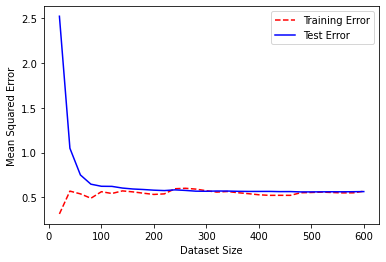

<Figure size 1440x1440 with 0 Axes>

In [13]:
mse_train_v = []
mse_test_v = []

TRAINING_SIZE_MAX = 601
TRAINING_SIZE_MIN = 20


# compute the MSE over data with sizes from TRAINING_SIZE_MIN to TRAINING_SIZE_MAX with increasing step 20
for train_size in range(TRAINING_SIZE_MIN, TRAINING_SIZE_MAX, 20):

    # TODO: 
    #   1. use the first train_size data records from the X_train and y_train as the training data
    #   2. train and compute the MSE on both training and test data using the train_and_test function
    #   3. add the computed MSE to the lists mse_train_v and mse_test_v
    # The code below is just for compilation. 
    # You need to replace it by your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
   # use the first split_coeff of the data as the training data
    X_train = X[:train_size,] # the first training_size records
    y_train = y[:train_size]

    mse_train, mse_test = train_and_test(X_train, y_train, X_test, y_test)
    
    
    mse_train_v.append(mse_train)
    mse_test_v.append(mse_test)
    print(mse_test, train_size)
    if train_size<=581 :
      train_size=train_size+20
    else:
      break

    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################
    

# The below code generates the learning curves plot
plt.figure(2)
plt.plot(np.arange(TRAINING_SIZE_MIN, TRAINING_SIZE_MAX, 20), mse_train_v, 'r--', label="Training Error")
plt.plot(np.arange(TRAINING_SIZE_MIN, TRAINING_SIZE_MAX, 20), mse_test_v, 'b-', label="Test Error")
plt.xlabel('Dataset Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.figure(figsize=(20,20))
plt.show()

### **Task 8**
Explain whether you think the model is underfitting or not and how much data you need before getting the optimal test error.

The training error increases in the beginning but becomes somewhat stable afterwards. The testing loss decreases very quickly in the beginning and then becomes stable with the training loss. This shows that the model is not underfitting. It would have been underfitting if the training error and the validation error did not meet at some point or the training error would continue to decrease till the end of the plot. Howvere, since thsi is not the case, we feel it is a good fit model. From the plot we can conclude that we need around 480 data points before we reach an optimal test error of around 0.56


## Polynomial Basis Expansion and Regularisation

In this part, we will try to improve the linear model by basis expansion and regularisation. 

The task is to 
1. apply the degree 2 basis expansion to the data, 
2. build the Ridge and Lasso models using scikit-learn, and
3. perform hyperparameter optimization to find the optimal hyperparameter lambda. 

For the hyperparameter optimization, you should set the last 20% of the training data for the purpose of validation and 
try lambda values [10^-4, 10^-3, 10^-2, 10^-1, 1, 10, 100]. 


We will use the scikit-learn package. You can import other scikit-learn packages if you think they are useful. Read the documentation available here: http://scikit-learn.org/stable/modules/classes.html

In [14]:
# import the preprocessing libs for standarization and basis expansion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 

# Ridge and Lasso linear model
from sklearn.linear_model import Ridge, Lasso 

### **Task 9**
Let's implement the function for expanding the basis of the dataset. 

Hints: use `PolynomialFeatures`

In [15]:
def expand_basis(X, degree):
    # TODO: expand the basis of X for the input degree
    # The code below is just for compilation. 
    # You need to replace it by your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
    # Hints: use the function PolynomialFeatures
    poly = PolynomialFeatures(degree)
    X_=poly.fit_transform(X)
    return X_
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################

### **Task 10**
We need to expand and standardize the the data,
and prepare the training, test and validation data on the expanded data. 
You should set the last 20% of the training data as the validation data.

Hints: use `StandardScaler` and `std_scaler` to standardize the data

In [16]:
def prepare_data(X, y, degree):
    # TODO: the training, test and validation data using the expanded dataset.
    # The code below is just for compilation. 
    # You need to replace it by your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
    # Hints: follow the steps     
    # 1. split the data (X, y) into training data (X_train, y_train) and test data (X_test, y_test)
    # 2. standardize the training data and do the same transformation to the test data

    # 3. expand the basis of the training data and test data
    # 4. split the expanded training data into training data (X_train_n, y_train_n) and validation data (X_train_v, y_train_v)
    # 5. standardize the training data and do the same transformation to the validation data
    
  
    X_train, y_train, X_test, y_test = split_data(X, y, 0.80)

 
    
    # transform data

 
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform( X_test )


  
    

    X_train=expand_basis(X_train_std, degree)
    X_test=expand_basis(X_test_std, degree)
   


    X_train_n, y_train_n, X_train_v, y_train_v = split_data(X_train, y_train, 0.80)
    X_train_n = scaler.fit_transform(X_train_n)
    X_train_v = scaler.transform( X_train_v )

    
    # further split the training data to training and validation data
    # training data
    X_train_n = np.nan_to_num(X_train_n)
    X_train_v = np.nan_to_num(X_train_v)
    y_train_n= np.nan_to_num(y_train_n)
    y_train_v = np.nan_to_num(y_train_v)

    return X_train, y_train, X_train_n, y_train_n, X_train_v, y_train_v, X_test, y_test, degree
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################

X_train, y_train, X_train_n, y_train_n, X_train_v, y_train_v, X_test, y_test, degree= prepare_data(X, y, 2) 

# here we expand the dataset with degree 2

**Why standardisation is required before basis expansion?**

Assume we have a dataset with two features x1 and x2, where x1 has a small scale while x2 has a large scale. When we perform basis expansion, we  get a new feature x1x2. Since x2 has a larger scale than x1, it is likely x2 will contribute more to the value of the new feature x1x2, which means a bias is introduce here. 
The correct way is to standardise the features before the basis expansion. In this case x1 and x2 have the same scale, so they contribute same to the new feature x1x2, i.e. no bias is introduced. 


**Why standardise the training data in step 5?**

Ridge and Lasso regularisation require the data to have mean of 0 and standard deviation of 1. However, after the basis expansion and splitting in step 4, the training data might not have the desired distribution, so we need to perform the standardisation on the training data. 

 
**Why not standardise both training and validation data together?**

When we use validation data to chose the hyperparameters, we treat the validation data like the test data -- we should not assume we can access these data. So we should standardise the training data and perform the same operation to the validation data. 

### **Task 11**
We have prepared the training data and the validation data. We can now choose the hyperparameter lambda for Ridge and Lasso using the validation data. 
We use the Ridge and Lasso models from scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

We train Ridge or Lasso models with different lambda values and check their performance on the validation data.
The lambda value that results the best performance is then the optimal lambda. 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267.9684464549539, tolerance: 0.24240462667517523
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9041018199127393, tolerance: 0.24240462667517523
  positive)


Ridge lambda: 1
Lasso lambda: 0.001


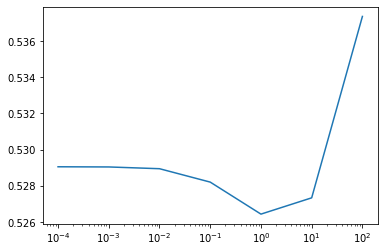

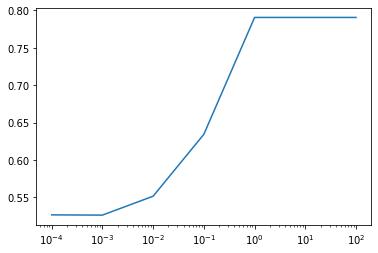

In [17]:
# The function takes the training and validation data as inputs, and 
# returns the lambda value that results the minimal mse
# We use is_ridge to indicate which the model is considered.
# is_ridge = True indicates Ridge while is_ridge = False indicates Lasso

def choose_hyper_param(X_train_n, y_train_n, X_train_v, y_train_v, is_ridge: bool):
    mse_arr = []
    lam_arr = []
    
    # Try lambda values from 10^-4 to 10^2. 
    # Record the mse and the lambda values in mse_arr and lam_arr
    # The code below is just for compilation. 
    # You need to replace it by your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
    if is_ridge==True:

      for pow_lam in range(-4, 3):
          lam = 10 ** pow_lam
          clf1 = Ridge(alpha=lam)
          clf1.fit(X_train_n, y_train_n)
          y_train_v_predict=clf1.predict(X_train_v)
        

          mse = np.square(np.subtract(y_train_v,y_train_v_predict)).mean()
          mse_arr.append(mse) 
          lam_arr.append(lam)
    else:
      for pow_lam in range(-4, 3):
          lam = 10 ** pow_lam
          clf2 = Lasso(alpha=lam)
          clf2.fit(X_train_n, y_train_n)
          y_train_v_predict=clf2.predict(X_train_v)
          mse = np.square(np.subtract(y_train_v,y_train_v_predict)).mean()
          mse_arr.append(mse) 
          lam_arr.append(lam)

    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################


    # get the index of the lambda value that has the minimal use
    lambda_idx_min = np.argmin(np.array(mse_arr))

    # plot of the lambda values and their mse
    plt.figure()
    plt.semilogx(lam_arr, mse_arr)

    # return the optimal lambda value
    return lam_arr[lambda_idx_min]

# call the function to choose the lambda for Ridge and Lasso
lam_ridge = choose_hyper_param(X_train_n, y_train_n, X_train_v, y_train_v, True)
lam_lasso = choose_hyper_param(X_train_n, y_train_n, X_train_v, y_train_v, False)

print("Ridge lambda:", lam_ridge)
print("Lasso lambda:", lam_lasso)

### **Task 12**:
Once you’ve obtained the optimal lambdas for Ridge and Lasso, train these models using these lambdas on the full training data. Then report
the training and test error.

In [18]:
def Ridge_model(X_train, y_train, X_test, y_test):
  clf1 = Ridge(alpha=lam_ridge)
  clf1.fit(X_train, y_train)
  y_pred_train=clf1.predict(X_train)
  y_pred_test=clf1.predict(X_test)
  Ridge_mse_train= np.square(np.subtract(y_train,y_pred_train)).mean()
  Ridge_mse_test=np.square(np.subtract(y_test, y_pred_test)).mean()
  return Ridge_mse_train, Ridge_mse_test

def Lasso_model(X_train, y_train, X_test, y_test):
  clf1 = Lasso(alpha=lam_lasso)
  clf1.fit(X_train, y_train)
  y_pred_train=clf1.predict(X_train)
  y_pred_test=clf1.predict(X_test)
  Lasso_mse_train= np.square(np.subtract(y_train,y_pred_train)).mean()
  Lasso_mse_test= np.square(np.subtract(y_test,y_pred_test)).mean()
  return Lasso_mse_train, Lasso_mse_test



mse_ridge_train, mse_ridge_test=Ridge_model(X_train, y_train, X_test, y_test)
mse_lasso_train, mse_lasso_test= Lasso_model(X_train, y_train, X_test, y_test)

###################################################
##### YOUR CODE ENDS HERE #########################
###################################################

# Report the result
print('For Ridge Regression with using degree %d polynomial expansion and lambda = %.4f' % (degree, lam_ridge))
print('--------------------------------------------------------------------------------\n')
print('MSE (Training) = %.4f' % mse_ridge_train)
print('MSE (Testing)  = %.4f' % mse_ridge_test)

print('\n\nFor Lasso with using degree %d polynomial expansion and lambda = %.4f' % (degree, lam_lasso))
print('---------------------------------------------------------------------\n')
print('MSE (Training) = %.4f' % mse_lasso_train)
print('MSE (Testing)  = %.4f' % mse_lasso_test)


For Ridge Regression with using degree 2 polynomial expansion and lambda = 1.0000
--------------------------------------------------------------------------------

MSE (Training) = 0.4952
MSE (Testing)  = 0.5125


For Lasso with using degree 2 polynomial expansion and lambda = 0.0010
---------------------------------------------------------------------

MSE (Training) = 0.4962
MSE (Testing)  = 0.5098


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6056512715360896, tolerance: 0.3043413221031145
  positive)


## Optional: Try Larger Degrees using K-fold Cross Validation



### **Task 13**
This is an optional task, which worths 5 bonus poitns.

The task is to try basis expansions with higher degrees (up to degree 4) and find the degree that results the best performance. 
Instead of always using the same validation set, you should use k-fold cross validation to find the optimal hyperparameters. 
You should report the optimal hyperparameters (the basis expansion degree and the lambdas) and the MSE of the Ridge and Lasso when you apply the optimal hyperparameters. 

Hints: Use `KFold` to do this automatically. 

In [19]:
#For task 13, we tried alphas ranging from 10^-4 to 10^2 and polynomial expansion degrees 1, 2, 3 and 4 with kfold= 10

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=10)
kf.get_n_splits(X)
KFold(n_splits=10, random_state=None, shuffle=False)
alphas=[0.0001,0.001, 0.01, 0.1, 1, 10, 100]
degree=[1,2,3,4]
for degree in degree:
  print("Degree =", degree)
  for alpha in alphas:
    l1=[]
    l2=[]
    mse_arr=[]
    lam_arr=[]
    acc=[]
  
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      scaler = StandardScaler()
      X_train_std = scaler.fit_transform(X_train)
      X_test_std = scaler.transform( X_test )


  
    

      X_train=expand_basis(X_train_std, degree)
      X_test=expand_basis(X_test_std, degree)
      clf1 = Ridge(alpha=alpha)
      clf1.fit(X_train, y_train)
      y_pred_train=clf1.predict(X_train)
      y_pred_test=clf1.predict(X_test)
      Ridge_mse_train= np.square(np.subtract(y_train,y_pred_train)).mean()
      Ridge_mse_test=np.square(np.subtract(y_test, y_pred_test)).mean()
      l1.append(Ridge_mse_train)
      l2.append(Ridge_mse_test)
   
  
    print("alpha =",alpha)
    print('MSE Train:',sum(l1)/len(l1))
    print('MSE Test:',sum(l2)/len(l2))
  
 

 






Degree = 1
alpha = 0.0001
MSE Train: 0.5628835612424441
MSE Test: 0.5690169694624411
alpha = 0.001
MSE Train: 0.5628835612431203
MSE Test: 0.5690168710875347
alpha = 0.01
MSE Train: 0.5628835613107408
MSE Test: 0.5690158876383602
alpha = 0.1
MSE Train: 0.5628835680584288
MSE Test: 0.5690060830697741
alpha = 1
MSE Train: 0.5628842287368475
MSE Test: 0.5689109651005734
alpha = 10
MSE Train: 0.5629384435554444
MSE Test: 0.5681987352673127
alpha = 100
MSE Train: 0.5644882747984771
MSE Test: 0.5677433454365082
Degree = 2
alpha = 0.0001
MSE Train: 0.4941853471922002
MSE Test: 0.5418428782610738
alpha = 0.001
MSE Train: 0.4941853471986275
MSE Test: 0.5418371599601478
alpha = 0.01
MSE Train: 0.49418534783908674
MSE Test: 0.5417803537315408
alpha = 0.1
MSE Train: 0.49418540971240005
MSE Test: 0.5412480704398843
alpha = 1
MSE Train: 0.49419012848565125
MSE Test: 0.5382302247458279
alpha = 10
MSE Train: 0.4943928633710499
MSE Test: 0.5379934417503182
alpha = 100
MSE Train: 0.49780563725970584
MSE

In [20]:
alphas=[0.0001,0.001, 0.01, 0.1, 1, 10, 100]
degree=[1,2,3,4]
for degree in degree:
  print("Degree =", degree)
  for alpha in alphas:
    l1=[]
    l2=[]
    mse_arr=[]
    lam_arr=[]
    acc=[]
  
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      scaler = StandardScaler()
      X_train_std = scaler.fit_transform(X_train)
      X_test_std = scaler.transform( X_test )


  
    

      X_train=expand_basis(X_train_std, degree)
      X_test=expand_basis(X_test_std, degree)
      clf1 = Lasso(alpha=alpha)
      clf1.fit(X_train, y_train)
      y_pred_train=clf1.predict(X_train)
      y_pred_test=clf1.predict(X_test)
      Ridge_mse_train= np.square(np.subtract(y_train,y_pred_train)).mean()
      Ridge_mse_test=np.square(np.subtract(y_test, y_pred_test)).mean()
      l1.append(Ridge_mse_train)
      l2.append(Ridge_mse_test)
   
  
    print("alpha =",alpha)
    print('MSE Train:',sum(l1)/len(l1))
    print('MSE Test:',sum(l2)/len(l2))
  
 

Degree = 1
alpha = 0.0001
MSE Train: 0.5628843751877262
MSE Test: 0.5689477185849179
alpha = 0.001
MSE Train: 0.5629646984877301
MSE Test: 0.568424997644264
alpha = 0.01
MSE Train: 0.5671152254600953
MSE Test: 0.5700369683523584
alpha = 0.1
MSE Train: 0.6172385864153123
MSE Test: 0.6177380569675597
alpha = 1
MSE Train: 0.7841892984821917
MSE Test: 0.7843296720486571
alpha = 10
MSE Train: 0.7841892984821917
MSE Test: 0.7843296720486571
alpha = 100
MSE Train: 0.7841892984821917
MSE Test: 0.7843296720486571
Degree = 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.65147414800731, tolerance: 0.3454274954627946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1733444990409225, tolerance: 0.3469309437386567
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.827828014821307, tolerance: 0.35048239564428196
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.35

alpha = 0.0001
MSE Train: 0.49423054772908054
MSE Test: 0.5365019529759385


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4839413273075479, tolerance: 0.3454274954627946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.133608195056695, tolerance: 0.35048239564428196
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8302072983847211, tolerance: 0.34529471415607854
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.626

alpha = 0.001
MSE Train: 0.4951161609461116
MSE Test: 0.535449419262448
alpha = 0.01
MSE Train: 0.512045600031158
MSE Test: 0.5480633035737486
alpha = 0.1
MSE Train: 0.5989366826479079
MSE Test: 0.6043206653568942
alpha = 1
MSE Train: 0.7841892984821917
MSE Test: 0.7843296720486571
alpha = 10
MSE Train: 0.7841892984821917
MSE Test: 0.7843296720486571
alpha = 100
MSE Train: 0.7841892984821917
MSE Test: 0.7843296720486571
Degree = 3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 921.4794391334265, tolerance: 0.3454274954627946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 903.1410600361203, tolerance: 0.3469309437386567
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 930.033354989328, tolerance: 0.35048239564428196
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 926.23739

alpha = 0.0001
MSE Train: 0.42135498536645805
MSE Test: 3.0150378456776616


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642.8109136248419, tolerance: 0.3454274954627946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264.79485282729115, tolerance: 0.3469309437386567
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666.5307979310668, tolerance: 0.35048239564428196
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 746.089

alpha = 0.001
MSE Train: 0.42811564403979785
MSE Test: 0.9230417812638692


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.630857259412096, tolerance: 0.3454274954627946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7125477648821743, tolerance: 0.34529471415607854
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4591236577962263, tolerance: 0.34346240925589827
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.52

alpha = 0.01
MSE Train: 0.47080342774406364
MSE Test: 1.0267857299689762
alpha = 0.1
MSE Train: 0.5899685623899783
MSE Test: 0.6320791889956483
alpha = 1
MSE Train: 0.7737067812013306
MSE Test: 0.7764104647376537
alpha = 10
MSE Train: 0.7841892984821917
MSE Test: 0.7843296720486571
alpha = 100
MSE Train: 0.7841892984821917
MSE Test: 0.7843296720486571
Degree = 4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 693.0994473745835, tolerance: 0.3454274954627946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664.5343224719423, tolerance: 0.3469309437386567
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703.254422805156, tolerance: 0.35048239564428196
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 691.96430

alpha = 0.0001
MSE Train: 0.29971998993029497
MSE Test: 761.7918994125021


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 809.7841499223663, tolerance: 0.3454274954627946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 780.4629125021098, tolerance: 0.3469309437386567
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 824.0580740020903, tolerance: 0.35048239564428196
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 813.3935

alpha = 0.001
MSE Train: 0.3291385409286244
MSE Test: 78.4130580938814


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 947.7947628264781, tolerance: 0.3454274954627946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 947.1007282655428, tolerance: 0.3469309437386567
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900.9696695136811, tolerance: 0.35048239564428196
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 954.3530

alpha = 0.01
MSE Train: 0.42740650188352625
MSE Test: 15.449523869035776


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.473391907522, tolerance: 0.3454274954627946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.800752195363657, tolerance: 0.3469309437386567
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162.41621644443853, tolerance: 0.35048239564428196
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.65283

alpha = 0.1
MSE Train: 0.5693206673462856
MSE Test: 7.324402603903829
alpha = 1
MSE Train: 0.7553939699220044
MSE Test: 1.280714010958198
alpha = 10
MSE Train: 0.7805223269899819
MSE Test: 0.7832302190319103
alpha = 100
MSE Train: 0.7841892984821917
MSE Test: 0.7843296720486571


In [21]:
#Ridge model with Alpha=10, degree=2
X, y = cp.load(open('winequality-white.pickle', 'rb'))
l1=[]
l2=[]
mse_arr=[]
lam_arr=[]
acc=[]
for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      scaler = StandardScaler()
      X_train_std = scaler.fit_transform(X_train)
      X_test_std = scaler.transform( X_test )


  
    

      X_train=expand_basis(X_train_std, 2)
      X_test=expand_basis(X_test_std, 2)
      clf1 = Ridge(alpha=10)
      clf1.fit(X_train, y_train)
      y_pred_train=clf1.predict(X_train)
      y_pred_test=clf1.predict(X_test)
      Ridge_mse_train= np.square(np.subtract(y_train,y_pred_train)).mean()
      Ridge_mse_test=np.square(np.subtract(y_test, y_pred_test)).mean()
      l1.append(Ridge_mse_train)
      l2.append(Ridge_mse_test)
   
print('Ridge Regression:')
print("alpha: 10")
print('MSE Train:',sum(l1)/len(l1))
print('MSE Test:',sum(l2)/len(l2))

#Lasso with alpha 0.001 and degree 2
l1=[]
l2=[]
mse_arr=[]
lam_arr=[]
acc=[]
for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      scaler = StandardScaler()
      X_train_std = scaler.fit_transform(X_train)
      X_test_std = scaler.transform( X_test )


  
    

      X_train=expand_basis(X_train_std, 2)
      X_test=expand_basis(X_test_std, 2)
      clf1 = Lasso(alpha=0.001)
      clf1.fit(X_train, y_train)
      y_pred_train=clf1.predict(X_train)
      y_pred_test=clf1.predict(X_test)
      Ridge_mse_train= np.square(np.subtract(y_train,y_pred_train)).mean()
      Ridge_mse_test=np.square(np.subtract(y_test, y_pred_test)).mean()
      l1.append(Ridge_mse_train)
      l2.append(Ridge_mse_test)
   
print('Lasso :')
print("alpha: 0.001")
print('MSE Train:',sum(l1)/len(l1))
print('MSE Test:',sum(l2)/len(l2))
  

Ridge Regression:
alpha: 10
MSE Train: 0.4943928633710499
MSE Test: 0.5379934417503182


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4839413273075479, tolerance: 0.3454274954627946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.133608195056695, tolerance: 0.35048239564428196
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8302072983847211, tolerance: 0.34529471415607854
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.626

Lasso :
alpha: 0.001
MSE Train: 0.4951161609461116
MSE Test: 0.535449419262448


From k fold cross validation:

Optimal Ridge model is:
degree: 2, 
Alpha: 10 , 
Test MSE: 0.5379

Optimal Lasso model is: 
degree: 2 , 
Alpha: 0.001, 
Test MSE: 0.5354